
## Instruksi Umum:

    1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.
    2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.




## Tugas 1: Multiple Linear Regression

    1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
    2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
    3. Lakukan feature scaling jika diperlukan.
    4. Buat model multiple linear regression menggunakan Scikit-Learn.
    5. Latih model pada data latih dan lakukan prediksi pada data uji.
    6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.



== Medical Cost Personal Dataset ==
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

Informasi kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

Statistik deskriptif:
            

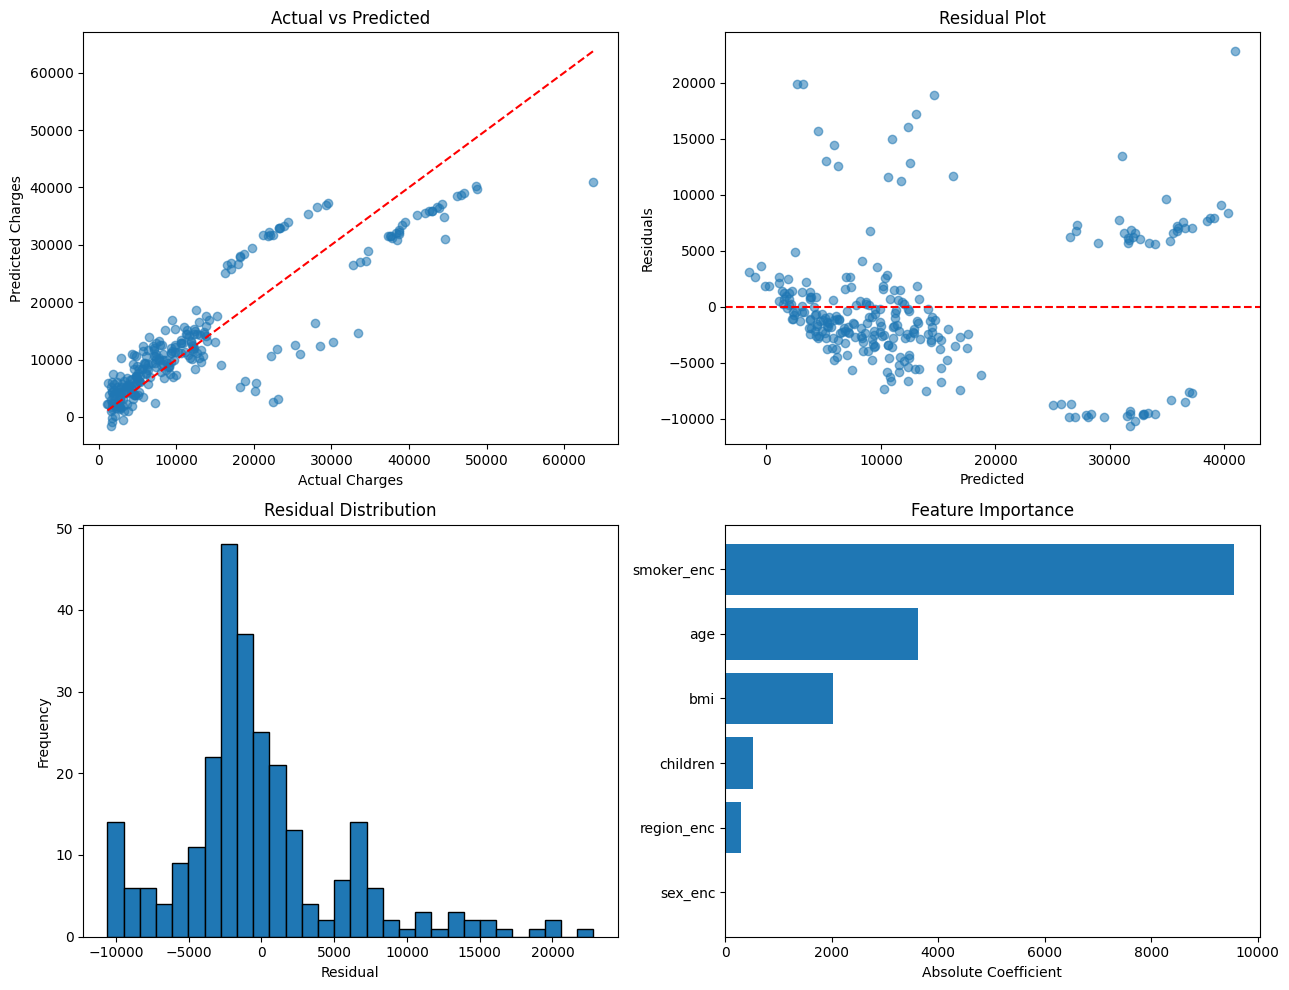


RINGKASAN ANALISIS
Model menjelaskan sekitar 78.33% variasi biaya medis.
Rata-rata deviasi prediksi (MAE) berada di sekitar $4,186.51.
RMSE sebesar $5,799.59, menunjukkan skala kesalahan tipikal model.


In [2]:
# ============================================================
# Multiple Linear Regression – Medical Cost Personal Dataset
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load Dataset
# ------------------------------------------------------------
data = pd.read_csv("/content/drive/MyDrive/ML_Dataset/insurance.csv")

print("== Medical Cost Personal Dataset ==")
print(data.head(), "\n")

print("Informasi kolom:")
print(data.info(), "\n")

print("Statistik deskriptif:")
print(data.describe(), "\n")

# ------------------------------------------------------------
# 2. Encoding & Feature Preparation
# ------------------------------------------------------------
print("="*60)
print("PREPROCESSING DATA")
print("="*60)

encoder = {
    "sex": LabelEncoder(),
    "smoker": LabelEncoder(),
    "region": LabelEncoder(),
}

# mapping tiga kolom kategori
for col, enc in encoder.items():
    data[col + "_enc"] = enc.fit_transform(data[col])
    print(f"Mapping {col:<7}: {dict(zip(enc.classes_, enc.transform(enc.classes_)))}")

# memilih fitur & target
feature_cols = ["age", "sex_enc", "bmi", "children", "smoker_enc", "region_enc"]
target_col = "charges"

X = data[feature_cols]
y = data[target_col]

print("\nDimensi fitur :", X.shape)
print("Dimensi target:", y.shape)

# ------------------------------------------------------------
# 3. Train-Test Split
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("\nJumlah data latih:", len(X_train))
print("Jumlah data uji   :", len(X_test))

# ------------------------------------------------------------
# 4. Standardisasi
# ------------------------------------------------------------
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 5. Model Training
# ------------------------------------------------------------
print("\n" + "="*60)
print("TRAINING MULTIPLE LINEAR REGRESSION")
print("="*60)

reg = LinearRegression()
reg.fit(Xtrain_scaled, y_train)

print("Model selesai dilatih.\n")

# ------------------------------------------------------------
# 6. Prediction & Evaluation
# ------------------------------------------------------------
y_train_pred = reg.predict(Xtrain_scaled)
y_test_pred = reg.predict(Xtest_scaled)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("== Evaluasi Model ==")
print(f"R² (Train): {r2_train:.4f}")
print(f"R² (Test) : {r2_test:.4f}")
print(f"MSE       : {mse:,.2f}")
print(f"RMSE      : {rmse:,.2f}")
print(f"MAE       : {mae:,.2f}")

# ------------------------------------------------------------
# 7. Menampilkan Koefisien
# ------------------------------------------------------------
print("\n" + "="*60)
print("KOEFISIEN REGRESI")
print("="*60)

for col, coef in zip(feature_cols, reg.coef_):
    print(f"{col:<12} : {coef:10.3f}")
print(f"{'Intercept':<12} : {reg.intercept_:10.3f}")

# ------------------------------------------------------------
# 8. Visualisasi
# ------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# Grafik aktual vs prediksi
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.55)
axes[0, 0].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                linestyle='--', color='red')
axes[0, 0].set_title("Actual vs Predicted")
axes[0, 0].set_xlabel("Actual Charges")
axes[0, 0].set_ylabel("Predicted Charges")

# Residual plot
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.55)
axes[0, 1].axhline(0, linestyle="--", color="red")
axes[0, 1].set_title("Residual Plot")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Residuals")

# Distribusi residual
axes[1, 0].hist(residuals, bins=30, edgecolor='black')
axes[1, 0].set_title("Residual Distribution")
axes[1, 0].set_xlabel("Residual")
axes[1, 0].set_ylabel("Frequency")

# Feature Importance (berdasarkan absolute coef)
importance = pd.DataFrame({
    "Feature": feature_cols,
    "AbsCoef": np.abs(reg.coef_)
}).sort_values("AbsCoef")

axes[1, 1].barh(importance["Feature"], importance["AbsCoef"])
axes[1, 1].set_title("Feature Importance")
axes[1, 1].set_xlabel("Absolute Coefficient")

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 9. Ringkasan
# ------------------------------------------------------------
print("\n" + "="*60)
print("RINGKASAN ANALISIS")
print("="*60)

print(f"Model menjelaskan sekitar {r2_test*100:.2f}% variasi biaya medis.")
print(f"Rata-rata deviasi prediksi (MAE) berada di sekitar ${mae:,.2f}.")
print(f"RMSE sebesar ${rmse:,.2f}, menunjukkan skala kesalahan tipikal model.")
